# Unit 5: The Classifier

### Learning Outcomes
By the end of this unit, students will be capable of:
* Plotting two features of a dataset to observe natural clusters
* Applying the distance formula to measure similarity between data points
* Classifying a new data point using the nearest neighbour method
* Justifying classification decisions using distance and visual evidence.


## Introduction

Humans have always grouped things by noticing similarities. We can tell one plant from another by looking at its leaves. We can tell one spice from another by its smell or texture. Traditional scholars used careful observation to classify herbs in Ayurveda, grains in agriculture, and even stars in the night sky. They grouped objects by their features. When two things looked similar, they belonged to the same group.

```{image} ../images/figure5p1.png
:alt: Description of the image
:class: bg-primary mb-1
:width: 500px
:align: center
```
In this unit, you will learn how a computer can do something similar. Instead of smell, shape, or texture, the computer uses numbers as features. It places these features on a graph, compares distances, and decides which examples are similar to each other. This simple idea is at the heart of many modern classification systems.

You will now work with a real dataset that contains measurements of flower petals and sepals. You will plot these points, observe natural groups, and classify a new flower by checking which group it is closest to.

## Activity 5.1: Loading a Simple Biology Dataset

The Iris dataset is one of the most famous small datasets used for learning classification. It contains measurements of 150 iris flowers. Each flower belongs to one of three species:

* 0 means setosa
* 1 means versicolor
* 2 means virginica

Each flower has four measurements:

* sepal length
* sepal width
* petal length
* petal width

```{image} images/figure5p2.png
:alt: Description of the image
:class: bg-primary mb-1
:width: 500px
:align: center
```

We will use only two of them (petal length and petal width) so that we can easily make a graph.

Here is how to load the dataset into a pandas DataFrame.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


The column called species has values 0, 1, and 2. These are numeric labels for the three Iris species. Later, you will see how they form natural groups on a graph.

For now, notice that each row is one flower and each column is one measurement.

> **_NOTE_:**
> When you use the command `df.head()`, Python shows only the top 5 rows of the table. This is helpful because the Iris dataset has `150` rows, which is too many to display at once. The `head()` function lets you take a quick look at the beginning of the dataset without filling your whole screen.
> If you want to see more rows, you can change the number inside the parentheses. For example:  `df.head(10)` shows the top 10 rows.
> If you want to look at the last few rows instead of the first, you can use the tail() function: `df.tail()` This shows the bottom 5 rows. These small tools help you explore big datasets in a manageable way.

## Activity 5.2: Plotting the Features on a Graph

To see how the flowers are grouped, you will create a scatter plot using petal length and petal width.

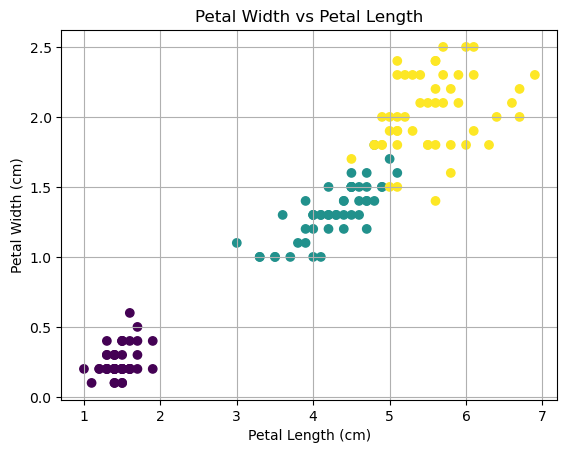

In [2]:
import matplotlib.pyplot as plt

x = df["petal length (cm)"]
y = df["petal width (cm)"]

species = df["species"]

plt.scatter(x, y, c=species)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Petal Width vs Petal Length")
plt.grid(True)
plt.show()

The colors show the three species. You will notice that the points are not mixed randomly. They form small clusters, each cluster representing one species. This is how the computer begins to understand groups. Points that sit close together on the graph usually belong to the same class.

## Activity 5.3: Measuring Closeness Using the Distance Formula

To classify a new flower, the computer checks which known flower it is closest to. To measure closeness, we use the distance formula you already know from coordinate geometry.

If a point is at `(x1, y1)` and another point is at `(x2, y2)`, the distance between them is:
$$ d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$$

Now pick a new, unknown flower. Let us define its measurements.

In [3]:
new_petal_length = 4.8
new_petal_width = 1.5

Next, measure its distance to every flower in the dataset.

In [4]:
distances = ((df["petal length (cm)"] - new_petal_length)**2 
             + (df["petal width (cm)"] - new_petal_width)**2)**0.5

distances.head()


0    3.640055
1    3.640055
2    3.733631
3    3.546830
4    3.640055
dtype: float64

You now have a list of distances from the new flower to all known flowers.
## Activity 5.4: Classifying a New Flower

To classify the new flower, find which known flower is the closest.

In [5]:
index_of_closest = distances.idxmin()
df.loc[index_of_closest]

sepal length (cm)    6.7
sepal width (cm)     3.1
petal length (cm)    4.7
petal width (cm)     1.5
species              1.0
Name: 86, dtype: float64

Look at the species value in that row. Since the closest flower belongs to that species, the new flower is also likely to belong to the same species.

> **_NOTE_:** The command `df.loc[index_of_closest]` is how we ask pandas to show the row at a specific position in the table. The word `loc` means "locate". When you give it a row number, it returns the entire row from the DataFrame. For example: `df.loc[0]` 
shows the first row.
> If the value stored in index_of_closest is 42, then: `df.loc[index_of_closest]` shows row number 42. This is helpful because once we know which flower is closest to the new one, we can locate that flower's data and check its species. You can also use loc to select a specific cell, like this: `df.loc[0, "petal length (cm)"]`
> This means row 0 and the column called "petal length (cm)". It returns one value. This is how pandas lets you quickly find the exact information you need inside a large table.

You can also plot the new flower on the graph.

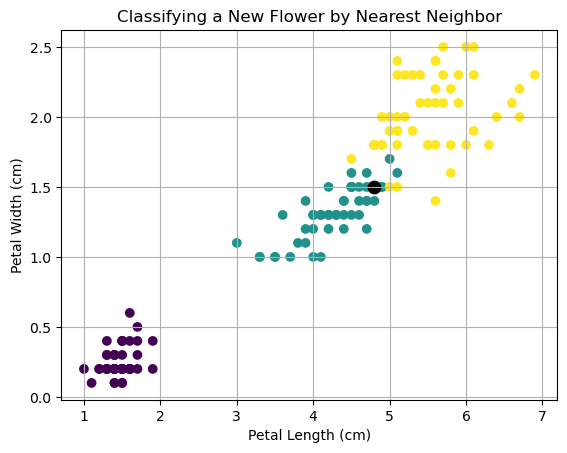

In [6]:
plt.scatter(x, y, c=species)
plt.scatter([new_petal_length], [new_petal_width], color="black", s=80)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Classifying a New Flower by Nearest Neighbour")
plt.grid(True)
plt.show()

### Interactive Activity 5.1
<iframe 
    src="../Activities.html#iris" 
    width="100%" 
    height="700px" 
    frameborder="0"
    style="border: 1px solid #eee; border-radius: 8px;">
</iframe>

The black point shows the new flower. You will see that it sits close to one of the clusters.

This simple method is called nearest neighbour classification.

## Practice Exercises
Try the tasks below to deepen your understanding.

1. Change the new flower's measurements and classify it again.
   *Hint: Try values like 1.4 and 0.2.*
2. Compute the distance between any two specific flowers in the dataset.
   *Hint: Use the same formula with the chosen rows.*
3. Pick a flower from species 0 and one from species 2. Plot them on the graph.
   *Hint: Use plt.scatter with single points.*
4. Create a new point that sits in the middle of two clusters. What happens when you classify it?
   *Hint: Use values halfway between group centers.*
5. Add a third feature to the distance formula to see if classification changes.
   *Hint: Include sepal length if you wish to experiment.*

### Solutions
1. Changing measurements and classifying:

In [7]:
new_petal_length = 1.4
new_petal_width = 0.2

distances = ((df["petal length (cm)"] - new_petal_length)**2 
             + (df["petal width (cm)"] - new_petal_width)**2)**0.5

df.loc[distances.idxmin()]

sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
species              0.0
Name: 0, dtype: float64

2. Distance between two known flowers:

In [8]:
i = 0
j = 50

x1, y1 = df.loc[i, "petal length (cm)"], df.loc[i, "petal width (cm)"]
x2, y2 = df.loc[j, "petal length (cm)"], df.loc[j, "petal width (cm)"]

((x1 - x2)**2 + (y1 - y2)**2)**0.5

3.511409973215888

3. Plotting two chosen points:

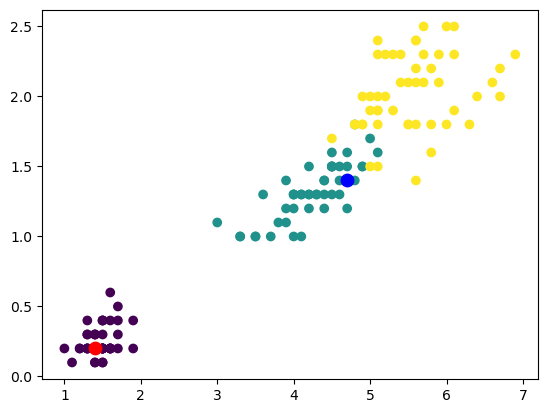

In [10]:
plt.scatter(x, y, c=species)
plt.scatter(df.loc[0, "petal length (cm)"], df.loc[0, "petal width (cm)"], color="red", s=80)
plt.scatter(df.loc[50, "petal length (cm)"], df.loc[50, "petal width (cm)"], color="blue", s=80)
plt.show()


4. A midpoint flower often lies between groups and may confuse the simple nearest neighbour method. This shows why classification is sometimes challenging.
5. Adding a third feature:

In [11]:
distances_3d = ((df["petal length (cm)"] - new_petal_length)**2 
                + (df["petal width (cm)"] - new_petal_width)**2
                + (df["sepal length (cm)"] - 5.0)**2)**0.5

Classification may change if the third feature is very different.

## Reflection

Take a moment to think about what you saw in this unit.

* How did the scatter plot help you see clusters in the data
* Why do points that are close together usually belong to the same group
* How does the distance formula give the computer a sense of closeness
* Where in real life have you seen groups of similar things
* How is this idea related to traditional ways of grouping plants, grains, or spices